<a href="https://www.kaggle.com/code/notsau/defect-prediction-xgboost-83?scriptVersionId=165382285" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![CELIK](https://www.pusatmetal.com.tr/wp-content/uploads/2018/12/karbon-celigi.jpg)

### ELİMİZDEKİ DATADA 7 TANE ÇELİK KUSURU SÜTUNU VAR
### EĞER BU KUSURLARDAN O SATIRDAKİ ÇELİKTE VARSA 1 YOKSA 0 YAZIYOR.
### BU 7 SÜTUNU MULTİCLASSİFİCATİON İLE TAHMİN EDİYORUZ

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e3/sample_submission.csv
/kaggle/input/playground-series-s4e3/train.csv
/kaggle/input/playground-series-s4e3/test.csv


In [2]:
df=pd.read_csv("/kaggle/input/playground-series-s4e3/train.csv")
test=pd.read_csv("/kaggle/input/playground-series-s4e3/test.csv")
sub=pd.read_csv("/kaggle/input/playground-series-s4e3/sample_submission.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# EDA
###### Veri hakkında detaylı bilgiler ediniyoruz.

In [3]:
df.head()

id  X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0   0        584        590     909972     909977            16            8   
1   1        808        816     728350     728372           433           20   
2   2         39        192    2212076    2212144         11388          705   
3   3        781        789    3353146    3353173           210           16   
4   4       1540       1560     618457     618502           521           72   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0            5               2274                    113   
1           54              44478                     70   
2          420            1311391                     29   
3           29               3202                    114   
4           67              48231                     82   

   Maximum_of_Luminosity  Length_of_Conveyer  TypeOfSteel_A300  \
0                    140                1358                 0   
1                    111                1687                 1   
2                    141                1400                 0   
3                    134                1387                 0   
4                    111                1692                 0   

   TypeOfSteel_A400  Steel_Plate_Thickness  Edges_Index  Empty_Index  \
0                 1                     50       0.7393       0.4000   
1                 0                     80       0.7772       0.2878   
2                 1                     40       0.0557       0.5282   
3                 1                     40       0.7202       0.3333   
4                 1                    300       0.1211       0.5347   

   Square_Index  Outside_X_Index  Edges_X_Index  Edges_Y_Index  \
0        0.5000           0.0059         1.0000         1.0000   
1        0.2581           0.0044         0.2500         1.0000   
2        0.9895           0.1077         0.2363         0.3857   
3        0.3333           0.0044         0.3750         0.9310   
4        0.0842           0.0192         0.2105         0.9861   

   Outside_Global_Index  LogOfAreas  Log_X_Index  Log_Y_Index  \
0                   0.0      1.2041       0.9031       0.6990   
1                   1.0      2.6365       0.7782       1.7324   
2                   0.0      4.0564       2.1790       2.2095   
3                   1.0      2.3222       0.7782       1.4314   
4                   1.0      2.7694       1.4150       1.8808   

   Orientation_Index  Luminosity_Index  SigmoidOfAreas  Pastry  Z_Scratch  \
0            -0.5000           -0.0104          0.1417       0          0   
1             0.7419           -0.2997          0.9491       0          0   
2            -0.0105           -0.0944          1.0000       0          0   
3             0.6667           -0.0402          0.4025       0          0   
4             0.9158           -0.2455          0.9998       0          0   

   K_Scatch  Stains  Dirtiness  Bumps  Other_Faults  
0         0       1          0      0             0  
1         0       0          0      0             1  
2         1       0          0      0             0  
3         1       0          0      0             0  
4         0       0          0      0             1

In [4]:
test.head()

id  X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  \
0  19219       1015       1033    3826564    3826588           659   
1  19220       1257       1271     419960     419973           370   
2  19221       1358       1372     117715     117724           289   
3  19222        158        168     232415     232440            80   
4  19223        559        592     544375     544389           140   

   X_Perimeter  Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0           23           46              62357                     67   
1           26           28              39293                     92   
2           36           32              29386                    101   
3           10           11               8586                    107   
4           19           15              15524                    103   

   Maximum_of_Luminosity  Length_of_Conveyer  TypeOfSteel_A300  \
0                    127                1656                 0   
1                    132                1354                 0   
2                    134                1360                 0   
3                    140                1690                 1   
4                    134                1688                 1   

   TypeOfSteel_A400  Steel_Plate_Thickness  Edges_Index  Empty_Index  \
0                 1                    150       0.3877       0.4896   
1                 1                     40       0.1629       0.4136   
2                 1                     40       0.0609       0.6234   
3                 0                    100       0.4439       0.3333   
4                 0                     60       0.8191       0.2619   

   Square_Index  Outside_X_Index  Edges_X_Index  Edges_Y_Index  \
0        0.3273           0.0095         0.5652         1.0000   
1        0.0938           0.0047         0.2414         1.0000   
2        0.4762           0.0155         0.6000         0.7500   
3        0.8182           0.0037         0.8000         1.0000   
4        0.4286           0.0158         0.8421         0.5333   

   Outside_Global_Index  LogOfAreas  Log_X_Index  Log_Y_Index  \
0                   1.0      2.8410       1.1139       1.6628   
1                   1.0      2.5682       0.9031       1.4472   
2                   0.0      2.4609       1.3222       1.3222   
3                   1.0      1.9031       0.6990       1.0414   
4                   0.0      2.1461       1.3222       1.1461   

   Orientation_Index  Luminosity_Index  SigmoidOfAreas  
0             0.6727           -0.2261          0.9172  
1             0.9063           -0.1453          0.9104  
2            -0.5238           -0.0435          0.6514  
3             0.1818           -0.0738          0.2051  
4            -0.5714           -0.0894          0.4170

In [5]:
sub.head() #kodu böyle yollamamız isteniyor

id  Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  Other_Faults
0  19219     0.5        0.5       0.5     0.5        0.5    0.5           0.5
1  19220     0.5        0.5       0.5     0.5        0.5    0.5           0.5
2  19221     0.5        0.5       0.5     0.5        0.5    0.5           0.5
3  19222     0.5        0.5       0.5     0.5        0.5    0.5           0.5
4  19223     0.5        0.5       0.5     0.5        0.5    0.5           0.5

In [6]:
df.info() #object değer yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [7]:
df.isnull().sum() #boş değer yok

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [8]:
df.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [9]:
df.nunique() #her sütundaki farklı değer sayısı

id                       19219
X_Minimum                 1191
X_Maximum                 1259
Y_Minimum                 3345
Y_Maximum                 3341
Pixels_Areas              1154
X_Perimeter                460
Y_Perimeter                331
Sum_of_Luminosity         2595
Minimum_of_Luminosity      162
Maximum_of_Luminosity       98
Length_of_Conveyer          99
TypeOfSteel_A300             2
TypeOfSteel_A400             2
Steel_Plate_Thickness       27
Edges_Index               1849
Empty_Index               1748
Square_Index              1118
Outside_X_Index            525
Edges_X_Index             1102
Edges_Y_Index              900
Outside_Global_Index         4
LogOfAreas                1072
Log_X_Index                206
Log_Y_Index                241
Orientation_Index         1598
Luminosity_Index          2046
SigmoidOfAreas             467
Pastry                       2
Z_Scratch                    2
K_Scatch                     2
Stains                       2
Dirtines

In [10]:
df[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
    'Dirtiness', 'Bumps', 'Other_Faults']].value_counts() #hedef sütunların değerleri

Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  Other_Faults
0       0          0         0       0          0      1               6540
                                                1      0               4761
                   1         0       0          0      0               3411
1       0          0         0       0          0      0               1465
0       1          0         0       0          0      0               1150
        0          0         0       0          0      0                818
                             1       0          0      0                568
                             0       1          0      0                485
                   1         0       0          0      1                 18
                                                1      0                  2
1       0          1         0       0          0      0                  1
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [12]:
df.head()

id  X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0   0        584        590     909972     909977            16            8   
1   1        808        816     728350     728372           433           20   
2   2         39        192    2212076    2212144         11388          705   
3   3        781        789    3353146    3353173           210           16   
4   4       1540       1560     618457     618502           521           72   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0            5               2274                    113   
1           54              44478                     70   
2          420            1311391                     29   
3           29               3202                    114   
4           67              48231                     82   

   Maximum_of_Luminosity  Length_of_Conveyer  TypeOfSteel_A300  \
0                    140                1358                 0   
1                    111                1687                 1   
2                    141                1400                 0   
3                    134                1387                 0   
4                    111                1692                 0   

   TypeOfSteel_A400  Steel_Plate_Thickness  Edges_Index  Empty_Index  \
0                 1                     50       0.7393       0.4000   
1                 0                     80       0.7772       0.2878   
2                 1                     40       0.0557       0.5282   
3                 1                     40       0.7202       0.3333   
4                 1                    300       0.1211       0.5347   

   Square_Index  Outside_X_Index  Edges_X_Index  Edges_Y_Index  \
0        0.5000           0.0059         1.0000         1.0000   
1        0.2581           0.0044         0.2500         1.0000   
2        0.9895           0.1077         0.2363         0.3857   
3        0.3333           0.0044         0.3750         0.9310   
4        0.0842           0.0192         0.2105         0.9861   

   Outside_Global_Index  LogOfAreas  Log_X_Index  Log_Y_Index  \
0                   0.0      1.2041       0.9031       0.6990   
1                   1.0      2.6365       0.7782       1.7324   
2                   0.0      4.0564       2.1790       2.2095   
3                   1.0      2.3222       0.7782       1.4314   
4                   1.0      2.7694       1.4150       1.8808   

   Orientation_Index  Luminosity_Index  SigmoidOfAreas  Pastry  Z_Scratch  \
0            -0.5000           -0.0104          0.1417       0          0   
1             0.7419           -0.2997          0.9491       0          0   
2            -0.0105           -0.0944          1.0000       0          0   
3             0.6667           -0.0402          0.4025       0          0   
4             0.9158           -0.2455          0.9998       0          0   

   K_Scatch  Stains  Dirtiness  Bumps  Other_Faults  
0         0       1          0      0             0  
1         0       0          0      0             1  
2         1       0          0      0             0  
3         1       0          0      0             0  
4         0       0          0      0             1

In [13]:
cat_cols=df[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
'Dirtiness', 'Bumps', 'Other_Faults', 'TypeOfSteel_A300','TypeOfSteel_A300','Outside_Global_Index']]
#bu sütunları kategorik sütun olarak alıyoruz (0 yada 1 vb.)

num_cols=df.drop(columns=['id','Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
'Dirtiness', 'Bumps', 'Other_Faults', 'TypeOfSteel_A300','TypeOfSteel_A300','Outside_Global_Index'])
#bu sütunlar haricini numerik olarak alıyoruz (değer aralığı geniş)

In [14]:
df.corr()

id  X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  \
id                     1.000000   0.004657   0.004406  -0.007632  -0.006422   
X_Minimum              0.004657   1.000000   0.989767   0.016071   0.014247   
X_Maximum              0.004406   0.989767   1.000000   0.018909   0.016513   
Y_Minimum             -0.007632   0.016071   0.018909   1.000000   0.969552   
Y_Maximum             -0.006422   0.014247   0.016513   0.969552   1.000000   
Pixels_Areas           0.000662  -0.464759  -0.391937  -0.007370  -0.007019   
X_Perimeter            0.003388  -0.451961  -0.378434  -0.012712  -0.012377   
Y_Perimeter            0.004432  -0.426514  -0.356528  -0.024876  -0.024798   
Sum_of_Luminosity      0.006150  -0.430073  -0.363092  -0.008189  -0.007809   
Minimum_of_Luminosity  0.006247   0.337748   0.275571  -0.017321  -0.018739   
Maximum_of_Luminosity -0.000925  -0.132955  -0.129669  -0.029160  -0.028312   
Length_of_Conveyer    -0.001049   0.308740   0.293466   0.016586   0.015735   
TypeOfSteel_A300       0.000074   0.220151   0.189802   0.044781   0.044867   
TypeOfSteel_A400      -0.001497  -0.218122  -0.188033  -0.044328  -0.044422   
Steel_Plate_Thickness  0.007583   0.188764   0.164789  -0.054389  -0.058683   
Edges_Index           -0.009751   0.167358   0.129800   0.035762   0.034222   
Empty_Index            0.000389  -0.175624  -0.146167  -0.033792  -0.032824   
Square_Index           0.006813   0.045635   0.035124   0.033952   0.034552   
Outside_X_Index       -0.003570  -0.522112  -0.432545   0.019685   0.017271   
Edges_X_Index         -0.007978   0.112746   0.095799   0.052710   0.051546   
Edges_Y_Index         -0.001631   0.460421   0.391743  -0.002647  -0.001382   
Outside_Global_Index   0.010620   0.222109   0.190474  -0.025374  -0.023285   
LogOfAreas            -0.005981  -0.505024  -0.428875  -0.001754  -0.000995   
Log_X_Index           -0.003837  -0.530728  -0.448348   0.015116   0.015624   
Log_Y_Index           -0.005560  -0.375324  -0.316770  -0.023702  -0.022941   
Orientation_Index      0.009182   0.276871   0.237157  -0.044202  -0.042490   
Luminosity_Index       0.006124  -0.068844  -0.079235  -0.023000  -0.022869   
SigmoidOfAreas        -0.002821  -0.376973  -0.319598  -0.031511  -0.030345   
Pastry                 0.006174   0.119306   0.108808  -0.015512  -0.016287   
Z_Scratch              0.002916  -0.107581  -0.126807  -0.012143  -0.012899   
K_Scatch              -0.000357  -0.510597  -0.441177   0.010612   0.011304   
Stains                 0.004396   0.046159   0.036824  -0.039151  -0.040874   
Dirtiness             -0.003034   0.044439   0.037949  -0.005449  -0.007416   
Bumps                  0.000462   0.205123   0.186930   0.056442   0.056610   
Other_Faults          -0.005091   0.169608   0.153448  -0.019227  -0.018533   

                       Pixels_Areas  X_Perimeter  Y_Perimeter  \
id                         0.000662     0.003388     0.004432   
X_Minimum                 -0.464759    -0.451961    -0.426514   
X_Maximum                 -0.391937    -0.378434    -0.356528   
Y_Minimum                 -0.007370    -0.012712    -0.024876   
Y_Maximum                 -0.007019    -0.012377    -0.024798   
Pixels_Areas               1.000000     0.835079     0.834543   
X_Perimeter                0.835079     1.000000     0.912579   
Y_Perimeter                0.834543     0.912579     1.000000   
Sum_of_Luminosity          0.797843     0.802072     0.809171   
Minimum_of_Luminosity     -0.622867    -0.603891    -0.602826   
Maximum_of_Luminosity      0.130499     0.158036     0.160831   
Length_of_Conveyer        -0.208256    -0.206060    -0.188716   
TypeOfSteel_A300          -0.304635    -0.300883    -0.304057   
TypeOfSteel_A400           0.300308     0.296467     0.299557   
Steel_Plate_Thickness     -0.232467    -0.225757    -0.189628   
Edges_Index               -0.337258    -0.326388    -0.320950   
Empty_Index                0.269263     0.322417     0.338079   
Square_Index  

# Data Visualization
###### Verimizi daha iyi anlamak için görselleştiriyoruz.

/tmp/ipykernel_18/1108830000.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


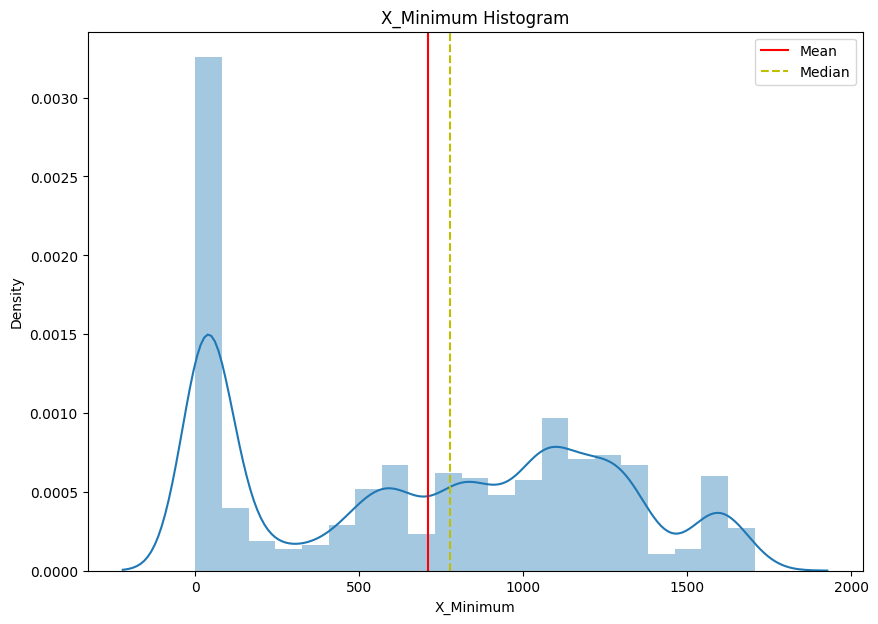

/tmp/ipykernel_18/1108830000.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


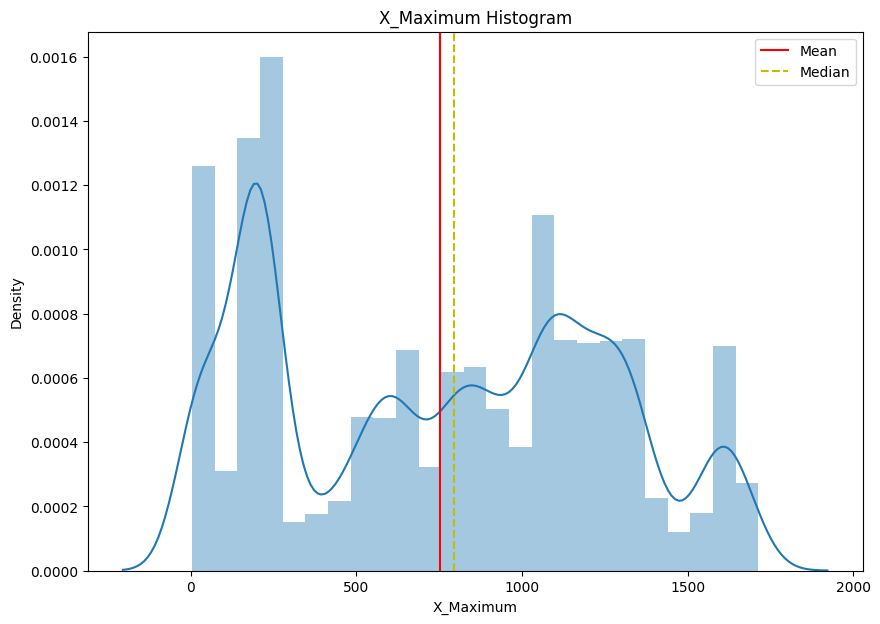

/tmp/ipykernel_18/1108830000.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


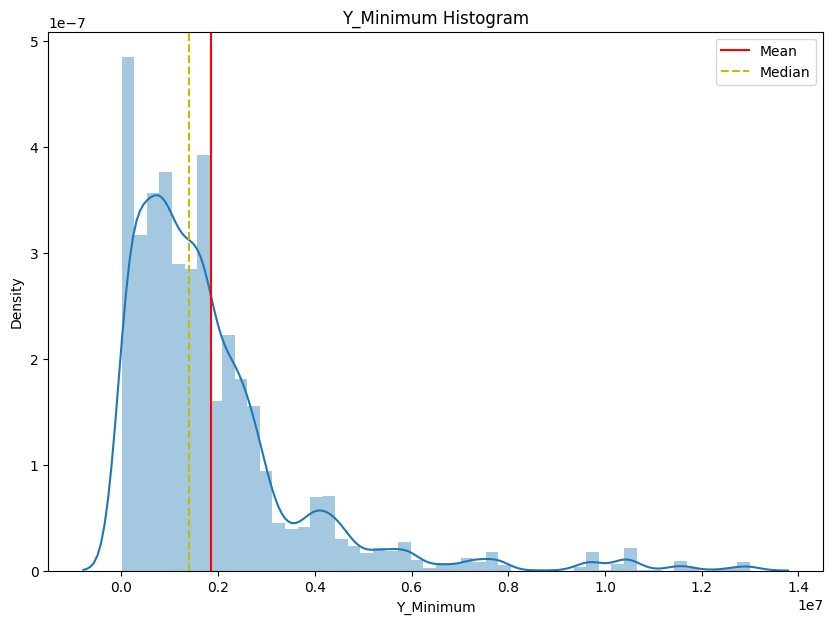

/tmp/ipykernel_18/1108830000.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


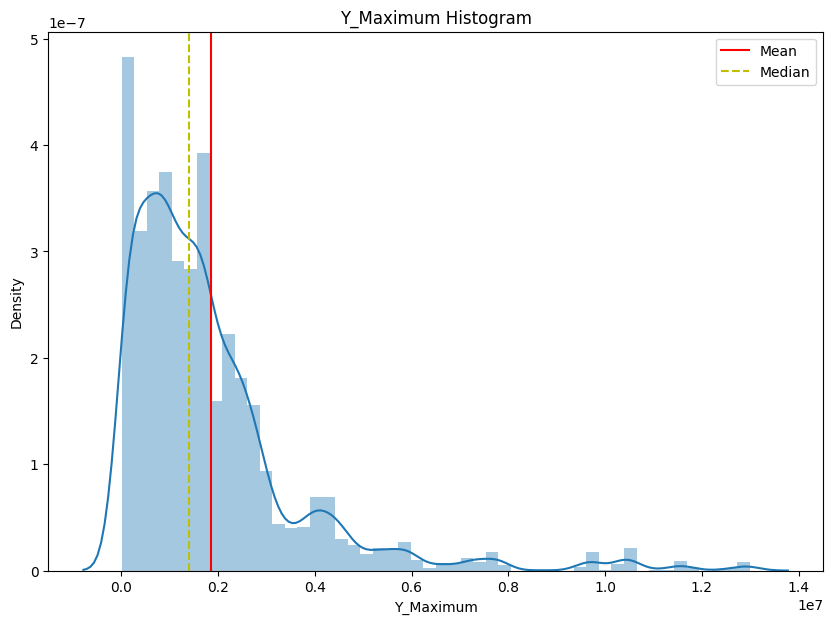

/tmp/ipykernel_18/1108830000.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


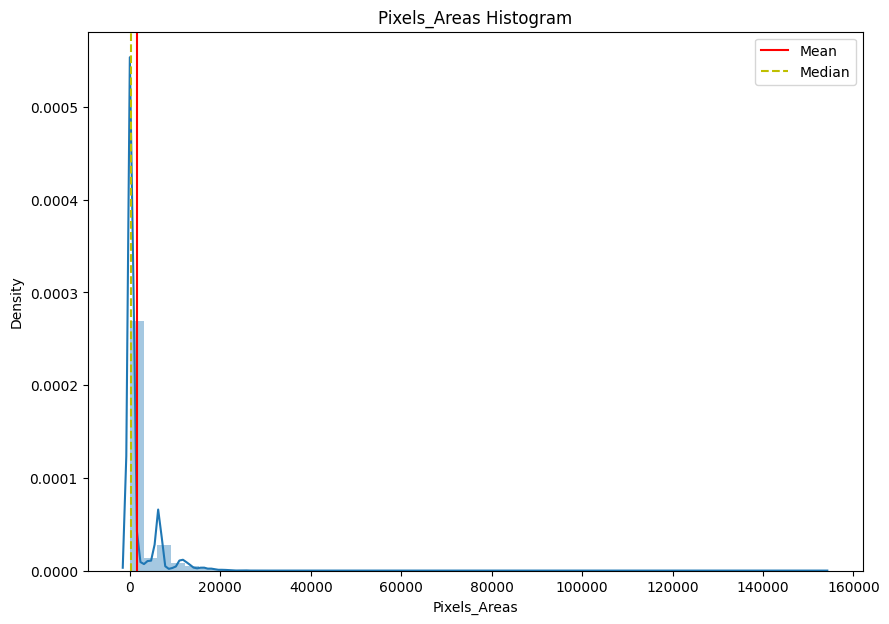

/tmp/ipykernel_18/1108830000.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


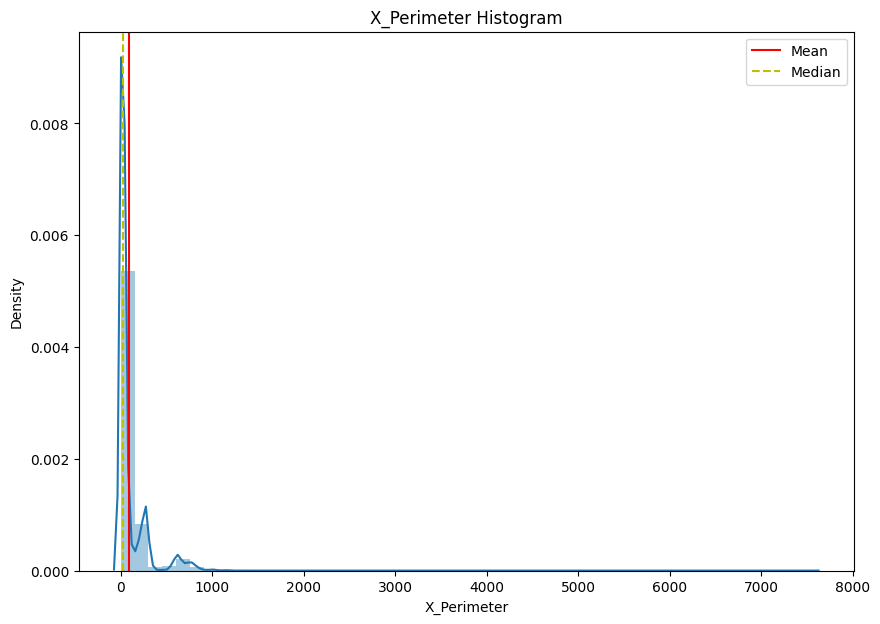

/tmp/ipykernel_18/1108830000.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


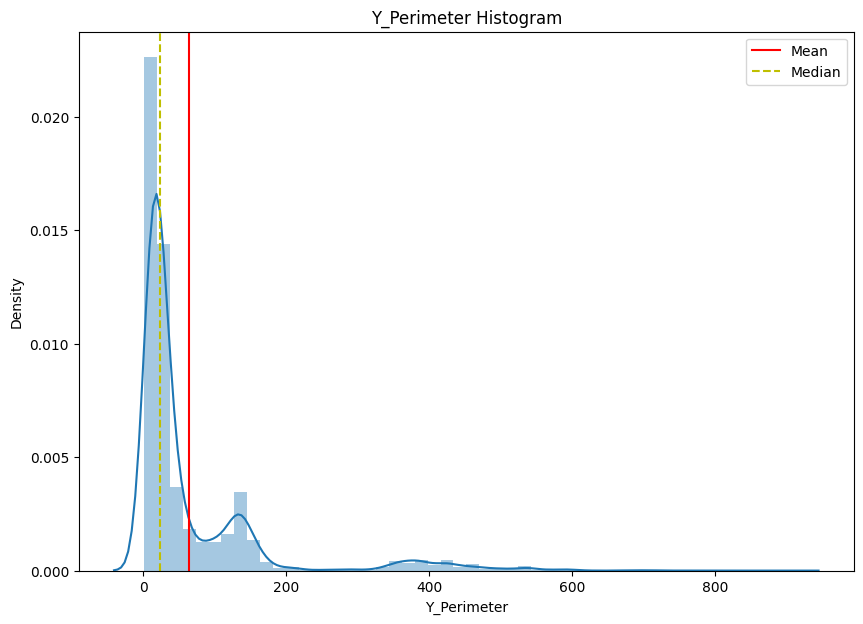

/tmp/ipykernel_18/1108830000.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


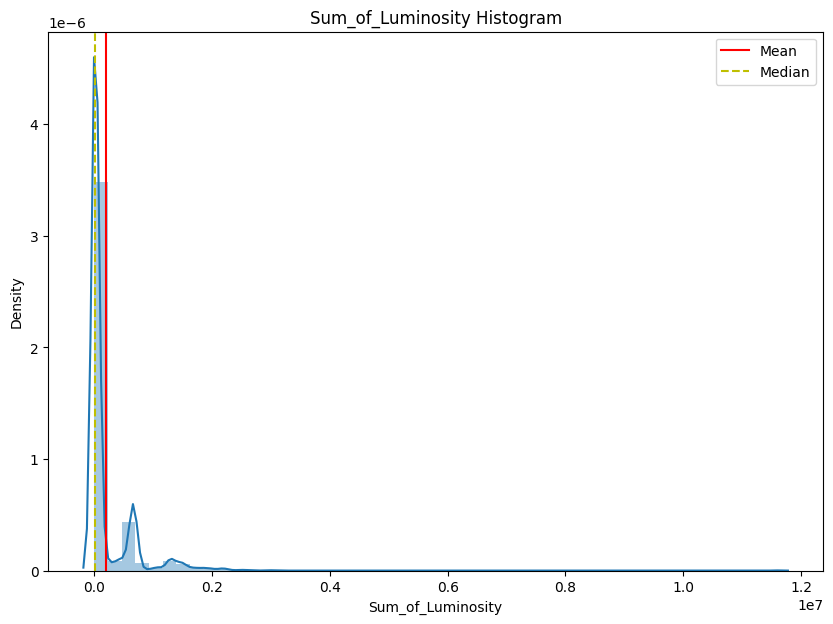

/tmp/ipykernel_18/1108830000.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


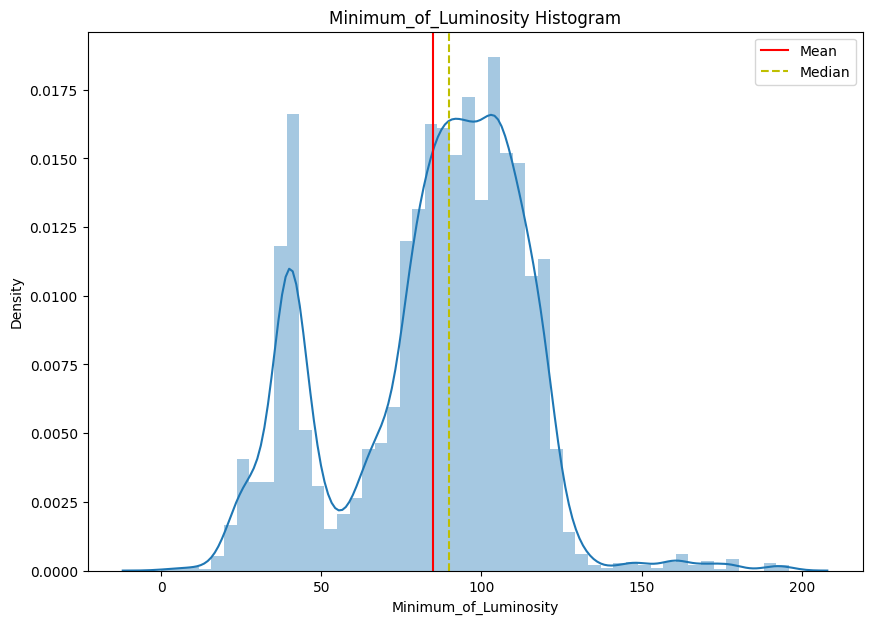

/tmp/ipykernel_18/1108830000.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


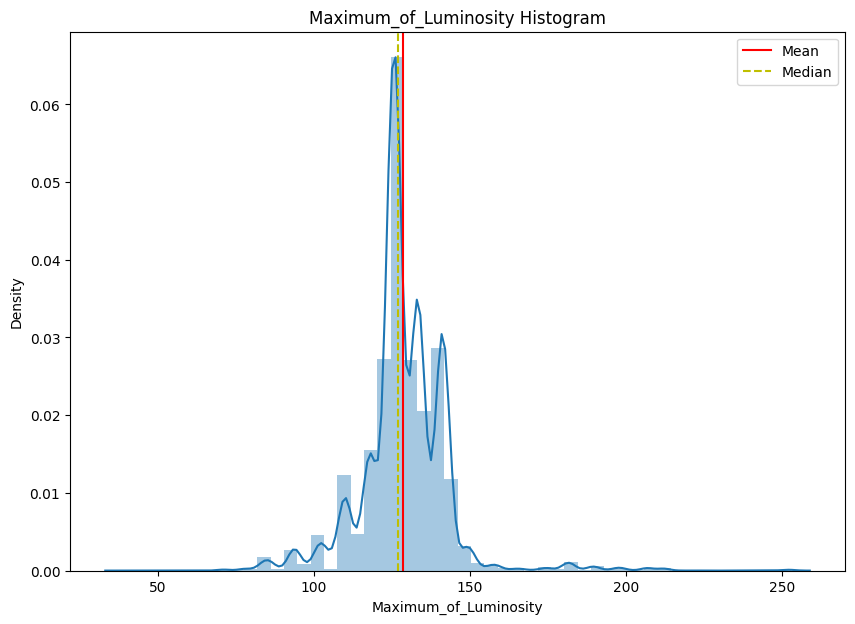

/tmp/ipykernel_18/1108830000.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


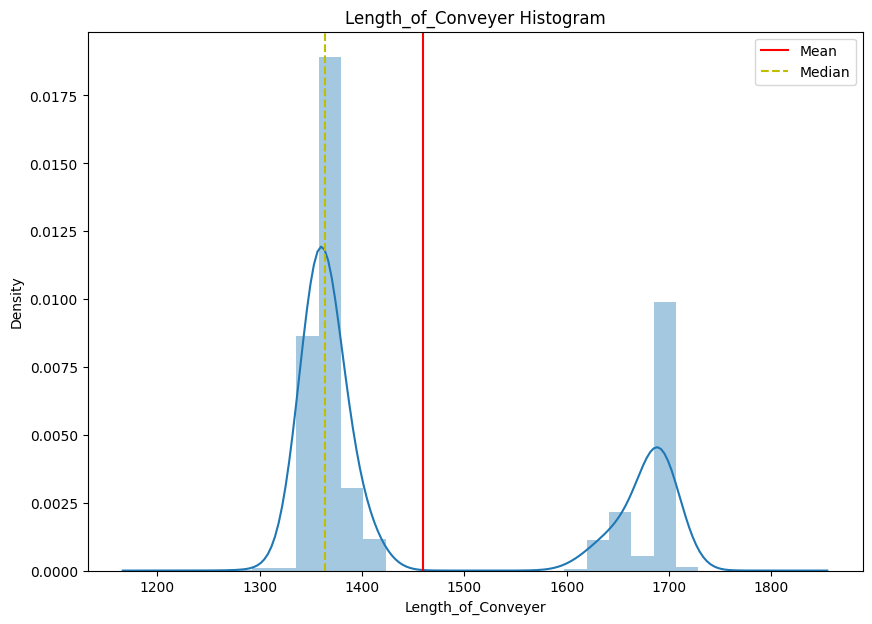

/tmp/ipykernel_18/1108830000.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


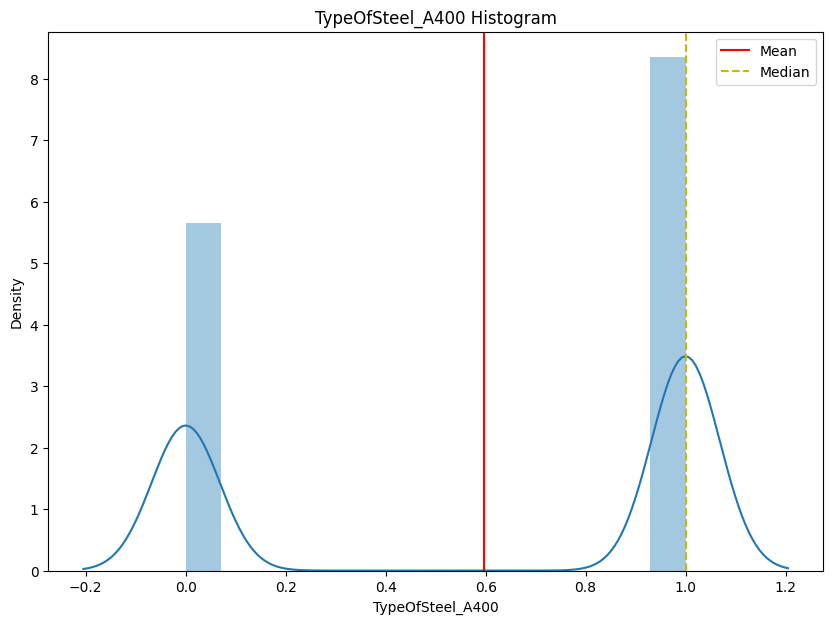

/tmp/ipykernel_18/1108830000.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


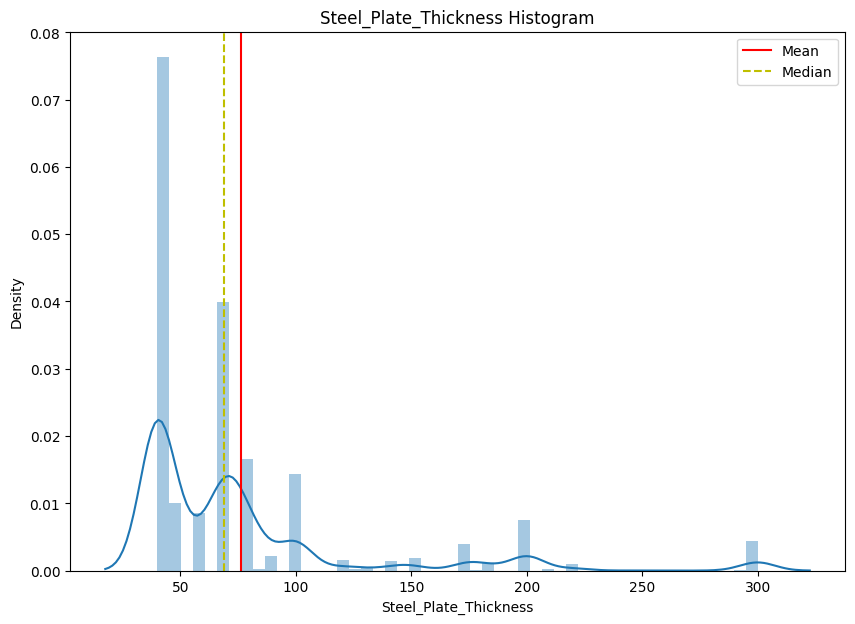

/tmp/ipykernel_18/1108830000.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


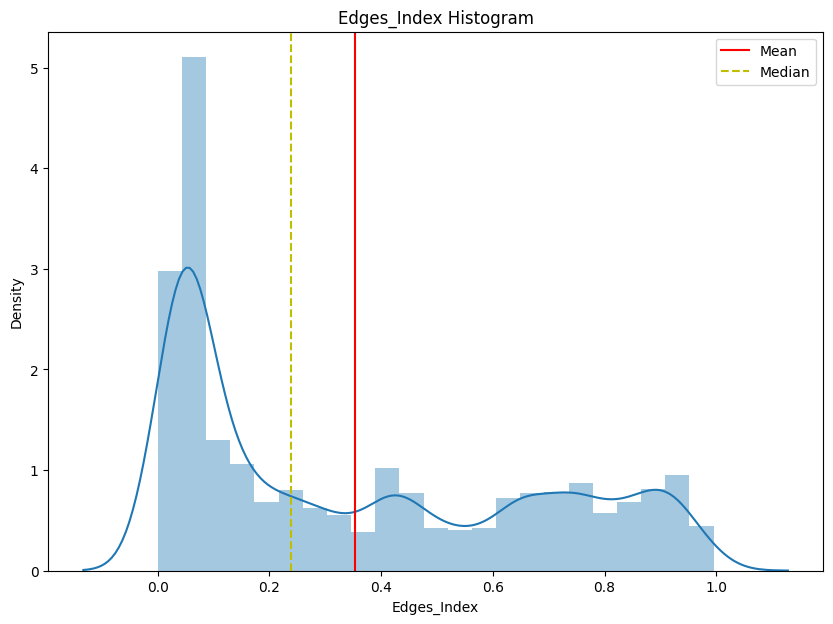

/tmp/ipykernel_18/1108830000.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


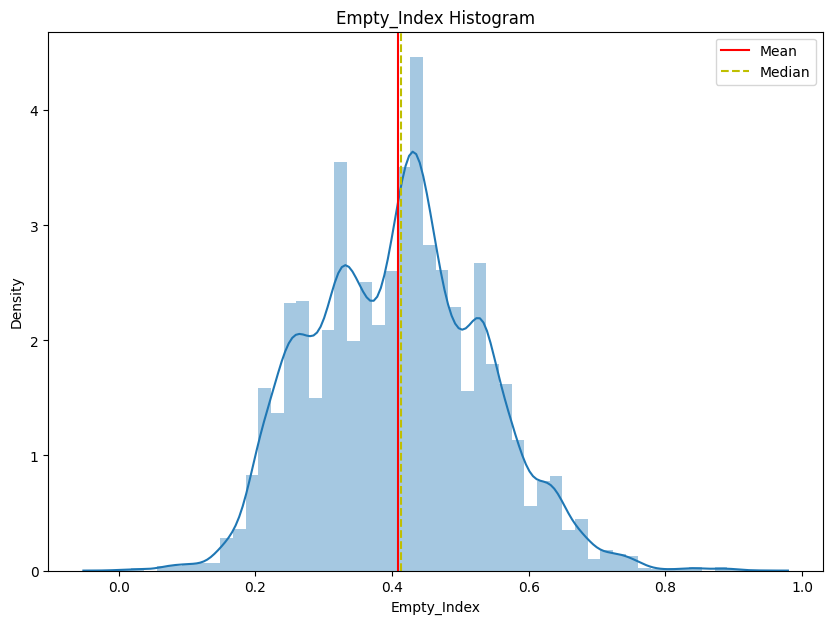

/tmp/ipykernel_18/1108830000.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


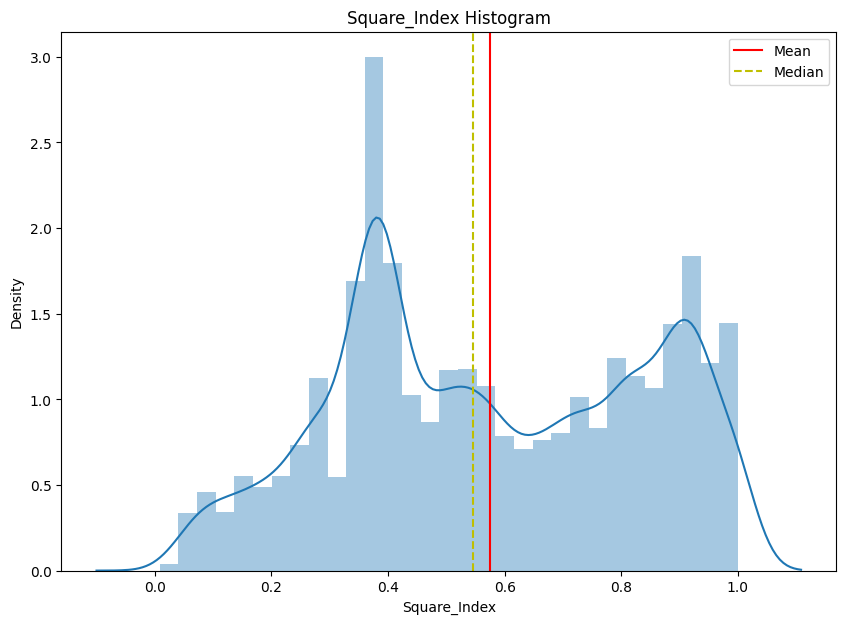

/tmp/ipykernel_18/1108830000.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


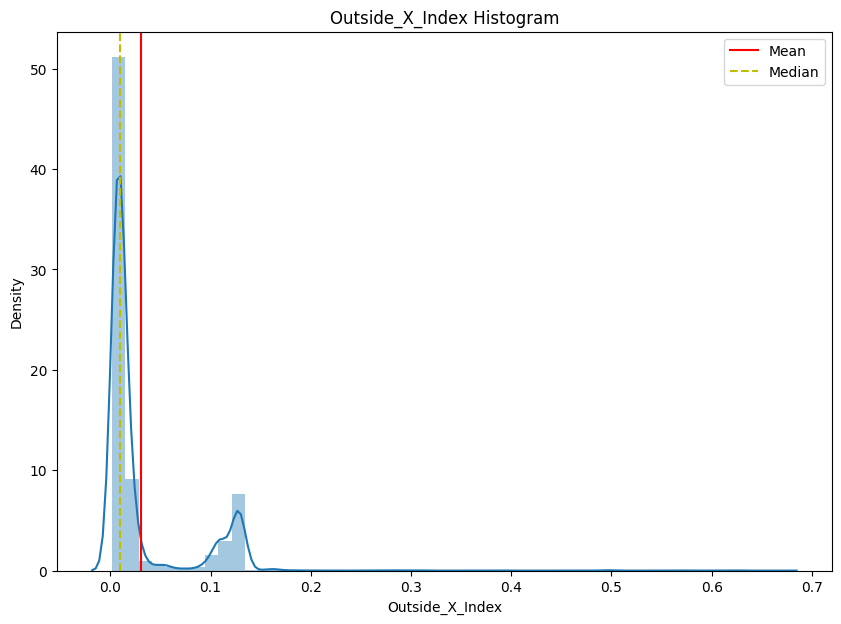

/tmp/ipykernel_18/1108830000.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


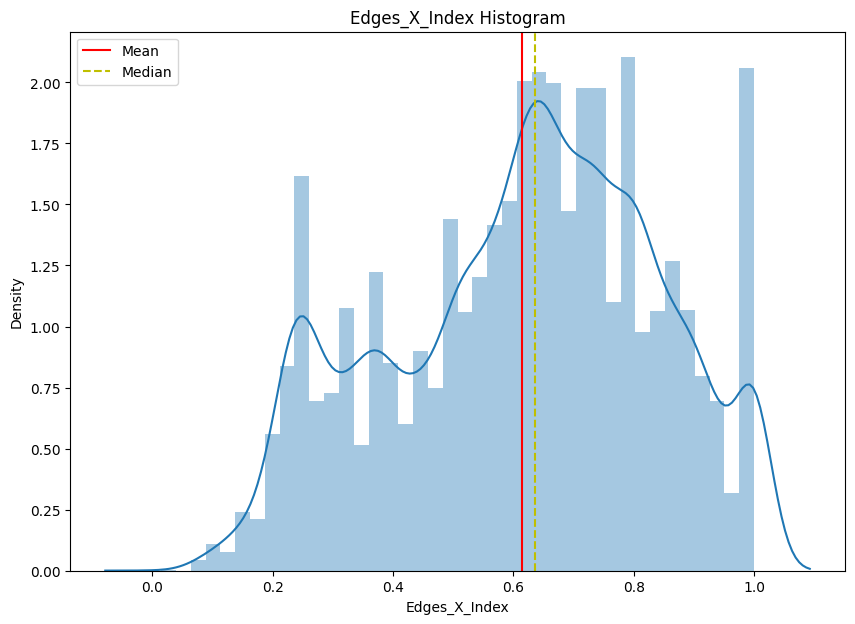

/tmp/ipykernel_18/1108830000.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


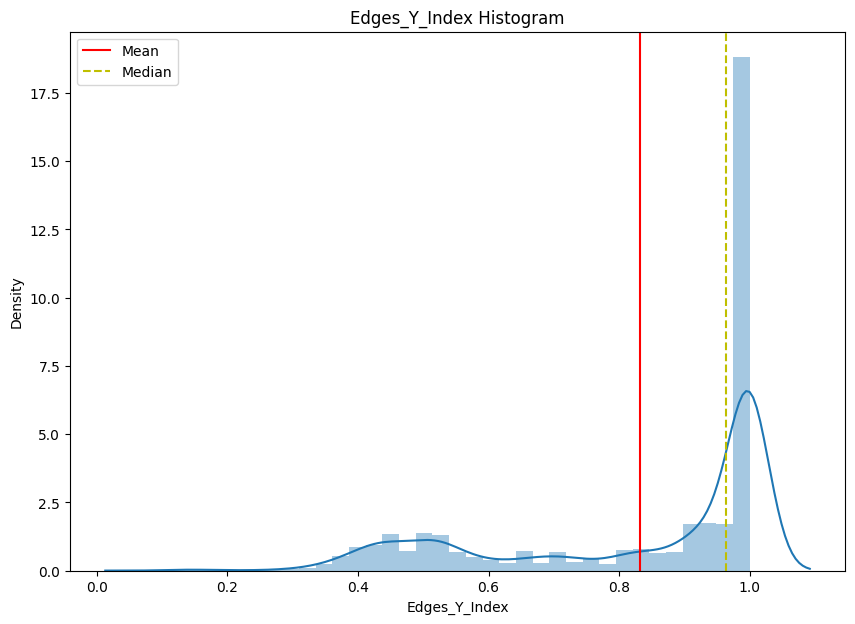

/tmp/ipykernel_18/1108830000.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


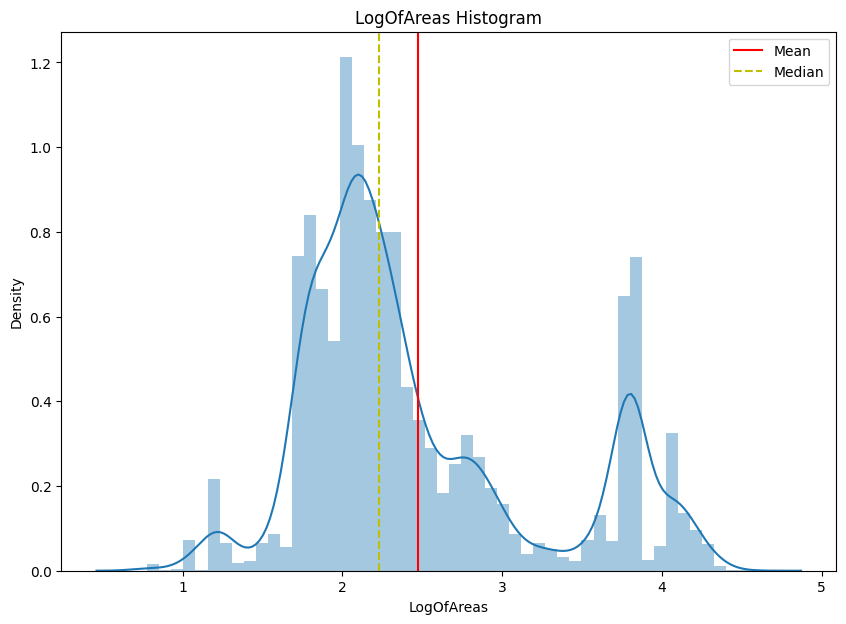

/tmp/ipykernel_18/1108830000.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


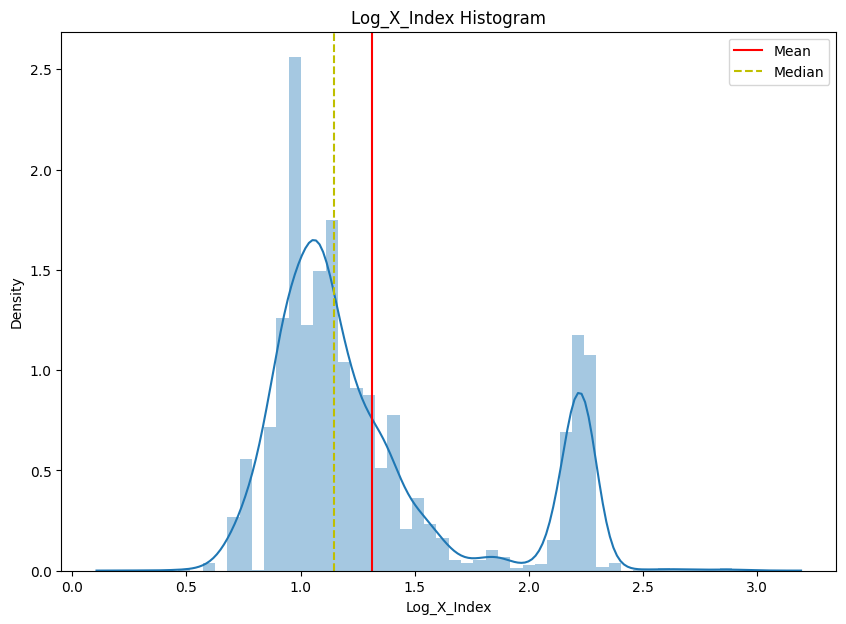

/tmp/ipykernel_18/1108830000.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


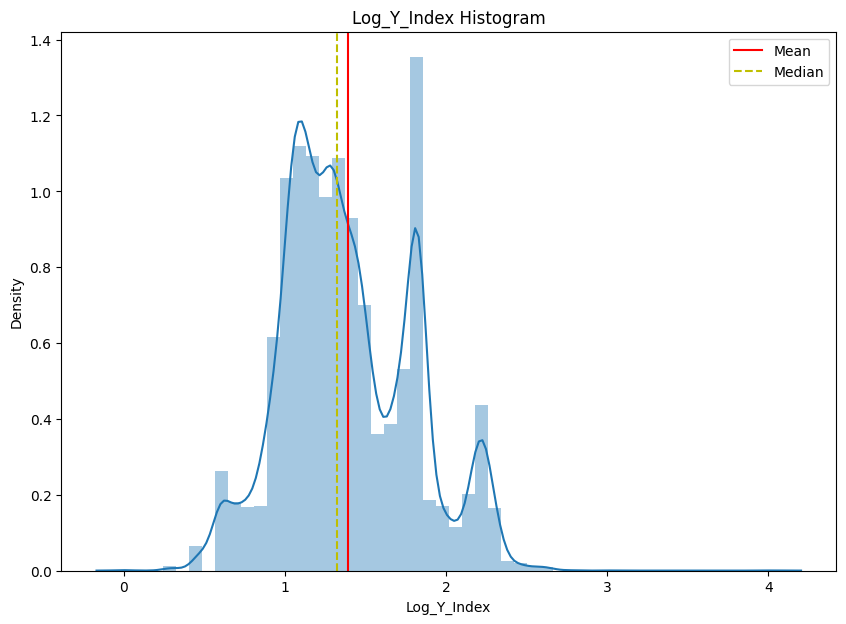

/tmp/ipykernel_18/1108830000.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


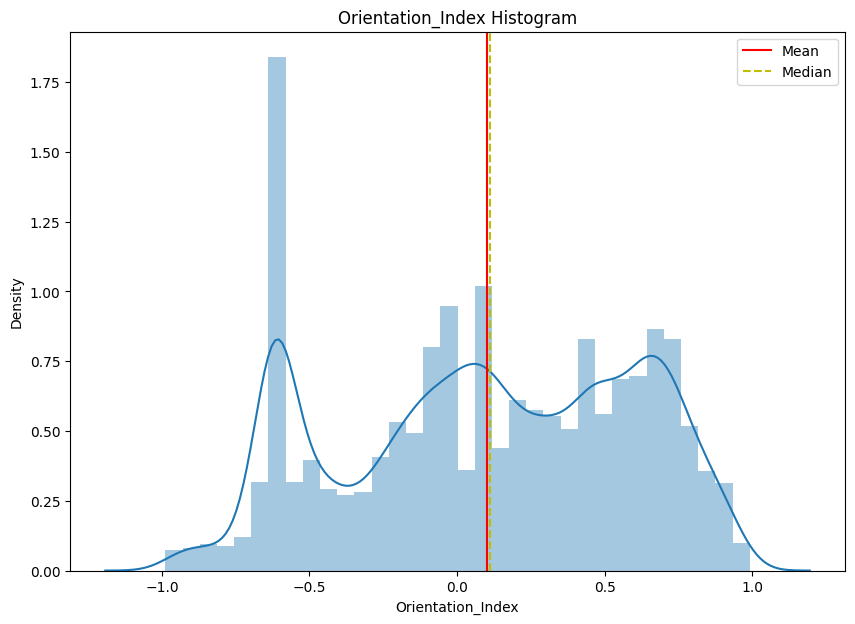

/tmp/ipykernel_18/1108830000.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


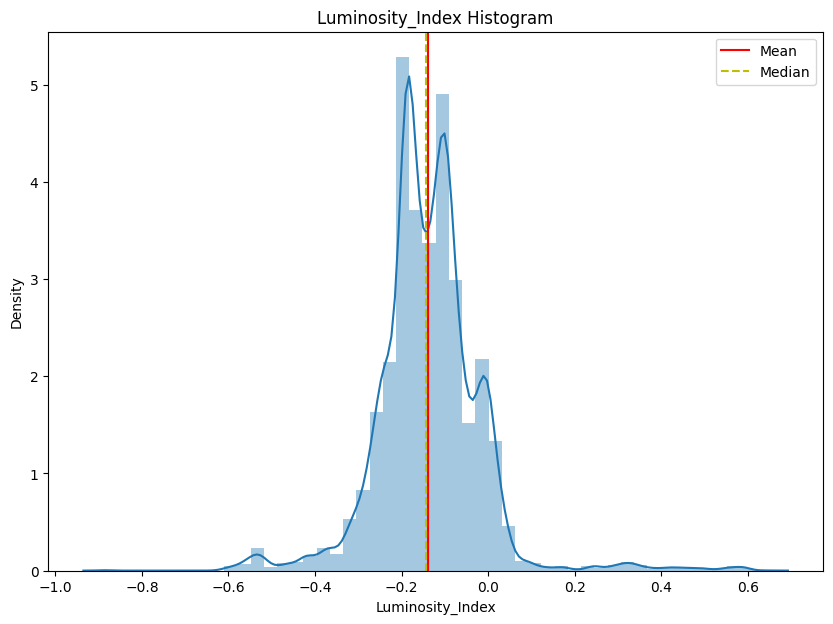

/tmp/ipykernel_18/1108830000.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True).set(title= col+' Histogram')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


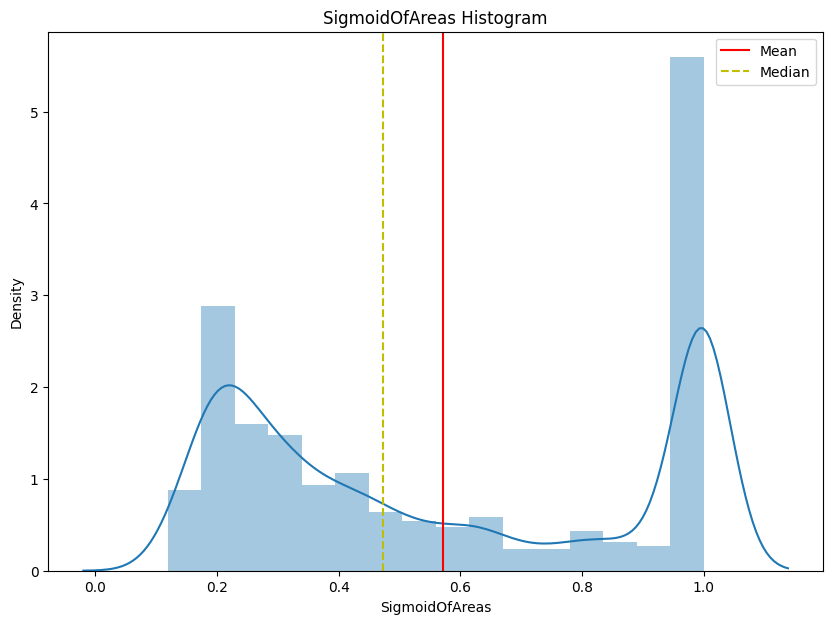

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


for col in num_cols:
    plt.figure(figsize=[10,7])
    sns.distplot(df[col],kde=True).set(title= col+' Histogram')
    plt.axvline(df[col].mean(),color='r', label='Mean')                    #ortalama kırmızı renkli olan
    plt.axvline(df[col].median(),color='y', linestyle='--',label='Median') #medyan sarı renkli olan
    plt.legend()
    plt.show()

In [16]:
plt.figure(figsize=(100,100))
sns.heatmap(df.corr(),annot=True, cmap='crest',annot_kws={"fontsize": 50})

<Axes: >

# Preparing Testing and Training Datasets
#### Veriyi modelleme için ayarlama

In [17]:
def scale(X):
    from sklearn import preprocessing
    scaled=preprocessing.StandardScaler()
    scaler=scaled.fit(X)
    X=scaler.transform(X)
    return X

# scale fonksiyonu verinin tamamını (1-0)'a indirmek için kullanılır

In [18]:
X=df.drop(columns=['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'])
y=df[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults' ]]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scale(X),y,train_size=0.99, random_state=42)
X.keys()
df=scale(test)

# Modelling
##### Modelleme aşaması.

In [19]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [20]:
def evaluate(y_test,ypred):
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import accuracy_score
    print("Accuracy: ",accuracy_score(y_test,y_pred)) 
    print("Recall Score: ", recall_score(y_test,y_pred, average='macro')) #Recall measures the proportion of true positive predictions among all actual positive instalnces. If we predicted 100 survived correctly whereas actually 100 survived out of which 67 predicted correctly so recall will be 0.67

In [21]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputClassifier
evalset = [(X_train, y_train), (X_test,y_test)]
xgb.set_config(verbosity=0)
xgb_model = xgb.XGBClassifier(tree_method="hist", multi_strategy="multi_output_tree", n_estimaters=5000)
xgb_model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset, verbose=False)
y_pred = xgb_model.predict(X_test)
evaluate(y_test,y_pred)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


Accuracy:  0.49222797927461137
Recall Score:  0.4587366321251339


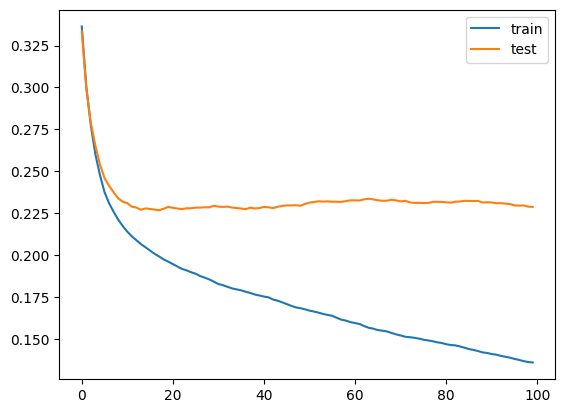

In [22]:
eval = xgb_model.evals_result()
plt.plot(eval['validation_0']['logloss'], label='train')
plt.plot(eval['validation_1']['logloss'], label='test')
plt.legend()
plt.show()

In [23]:
import numpy as np

result=np.round(xgb_model.predict_proba(df),1)
result

array([[0.5, 0. , 0. , ..., 0. , 0.1, 0.4],
       [0.1, 0. , 0. , ..., 0.1, 0. , 0.7],
       [0. , 0. , 0.1, ..., 0. , 0.2, 0.4],
       ...,
       [0. , 0. , 0.9, ..., 0. , 0. , 0.1],
       [0.2, 0. , 0. , ..., 0.2, 0.1, 0.6],
       [0. , 0. , 0.8, ..., 0. , 0. , 0.1]], dtype=float32)

In [24]:
y.head()

Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  Other_Faults
0       0          0         0       1          0      0             0
1       0          0         0       0          0      0             1
2       0          0         1       0          0      0             0
3       0          0         1       0          0      0             0
4       0          0         0       0          0      0             1

In [25]:
submission = pd.DataFrame(result, columns=y.keys())

In [26]:
submission.insert(0, 'id', test['id']) 

In [27]:
submission.head()

id  Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  Other_Faults
0  19219     0.5        0.0       0.0     0.0        0.0    0.1           0.4
1  19220     0.1        0.0       0.0     0.0        0.1    0.0           0.7
2  19221     0.0        0.0       0.1     0.0        0.0    0.2           0.4
3  19222     0.1        0.0       0.0     0.0        0.1    0.4           0.1
4  19223     0.0        0.0       0.0     0.0        0.0    0.6           0.2

In [28]:
submission.to_csv('submission.csv', index=False)